In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
dtype = {
    'id': np.int8,
    'goal': str,
    'country': str,
    'duration': np.int32,
    'category1': str,
    'category2': str,
    'html_content': str,
    'state': np.int8
}
train_df = pd.read_csv('../data/train.csv', dtype=dtype)
test_df = pd.read_csv('../data/test.csv', dtype=dtype)

In [4]:
sample = train_df.html_content[1]
print(sample)

<div class="contents"><div><h1 class="page-anchor" id="_xxx_">Hello, I am Augustinas. I am a graphic designer and I decided to create a brand of clothes speaking and mocking war and dictatorship. </h1><p>I think that street fashion is not haute couture – it is just ordinary people hurrying somewhere, doing their daily activities, but are obliged to always look brilliant.</p>
<p> Even a person that feels poor in the light of gigantic companies or dictatorial regimes may express his/her ideas in the street. My brand must inspire a young person to speak and not to be afraid to say his/her opinion on political and social issues freely.</p><div class="template asset" contenteditable="false" data-alt-text="" data-caption="" data-id="_xxx_">
<figure>
<img alt="" class="fit lazyload" data-src="http://dummy.com"/>
</figure>
</div>
<div class="template asset" contenteditable="false" data-alt-text="" data-caption="" data-id="_xxx_">
<figure>
<img alt="" class="fit lazyload" data-src="http://dummy

In [5]:
soup = BeautifulSoup(sample, 'lxml')
soup.text

'Hello, I am Augustinas. I am a graphic designer and I decided to create a brand of clothes speaking and mocking war and dictatorship.\xa0I think that street fashion is not haute couture – it is just ordinary people hurrying somewhere, doing their daily activities, but are obliged to always look brilliant.\n\xa0Even a person that feels poor in the light of gigantic companies or dictatorial regimes may express his/her ideas in the street. My brand must inspire a young person to speak and not to be afraid to say his/her opinion on political and social issues freely.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0All shirts are made of natural high-quality materials. They are also used in the army, so they are very strong and adapted to the free movement.All buttons are made of metal or copper and some of them are used in the real parade uniforms of soldiers.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0My goal is to make peo

In [6]:
len(soup.find_all('figure'))

15

In [30]:
soup.find('h1').text

'Hello, I am Augustinas. I am a graphic designer and I decided to create a brand of clothes speaking and mocking war and dictatorship.\xa0'

In [5]:
sample_text =soup.text
sample_words = sample_text.split(' ')
print(len(set(sample_words)), sample_words[:5])

467 ['Mark', 'Saggia', 'is', 'an', 'Italian']


In [53]:
to_text = lambda x: BeautifulSoup(x, 'lxml').text
train_df['html_content_text'] = train_df.html_content.apply(to_text)
train_df.html_content_text = train_df.html_content_text.str.lower()
vectorizer = CountVectorizer()
corpus = train_df.html_content_text
x = vectorizer.fit_transform(corpus).toarray()

In [38]:
col_mean = np.mean(x, axis=0)
thre = 0.25
col_idx = (col_mean >= thre)
x_scaled = x[:, col_idx]

In [39]:
bow_df = pd.DataFrame(data=x_scaled)
bow_df['label'] = train_df.state.copy()
print(bow_df.shape)

(10545, 150)


In [44]:
bow_df.groupby('label').mean()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
label,,,,,,,,,,,,,,,,,,,,,
0,0.362158,0.254065,0.602066,0.277023,1.135068,0.612206,0.390281,1.058351,10.220777,0.324852,...,2.672470,2.684523,0.423761,0.202985,0.466424,0.557681,0.260953,0.374402,2.495504,1.356227
1,0.563746,0.298420,0.980068,0.432869,1.610192,0.789959,0.359346,1.674878,14.729974,0.425536,...,3.206845,3.870628,0.706657,0.312900,0.652877,0.510342,0.386235,0.557164,3.896202,2.024069


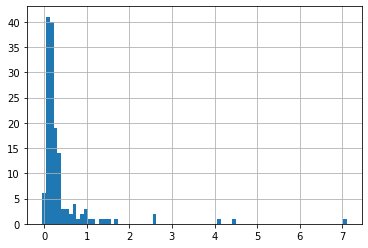

In [50]:
bow_df.groupby('label').mean().diff().iloc[1, :].hist(bins=80)

In [18]:
figure_count = lambda x: len(BeautifulSoup(x, 'lxml').find_all('figure'))
train_df['html_content_figure_count'] = train_df.html_content.apply(figure_count)

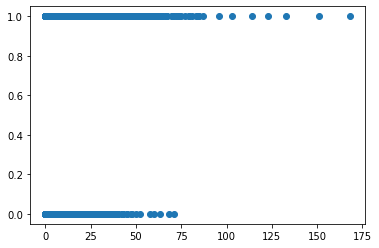

In [20]:
plt.scatter(train_df.html_content_figure_count, train_df.state)

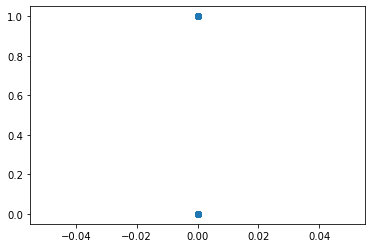

In [20]:
plt.scatter(train_df.html_content_count, train_df.state)

In [32]:
to_h1 = lambda x: BeautifulSoup(x, 'lxml').find('h1').text if BeautifulSoup(x, 'lxml').find('h1') is not None else ''
train_df['html_content_h1'] = train_df.html_content.apply(to_h1)
train_df.html_content_h1 = train_df.html_content_h1.str.lower()
vectorizer = CountVectorizer()
corpus = train_df.html_content_h1.values.reshape(-1)
x = vectorizer.fit_transform(corpus).toarray()

In [34]:
x.shape

(10545, 6700)

In [51]:
col_mean = np.mean(x, axis=0)
thre = 1 / 1000
col_idx = (col_mean >= thre)
x_scaled = x[:, col_idx]
x_scaled.shape

(10545, 299)

In [52]:
np.array(vectorizer.get_feature_names())[col_idx]

array(['00', '000', '10', '20', 'able', 'about', 'after', 'album', 'all',
       'also', 'am', 'amazon', 'an', 'and', 'any', 'app', 'are', 'around',
       'art', 'artist', 'artists', 'arts', 'as', 'at', 'ava', 'back',
       'based', 'be', 'beautiful', 'because', 'been', 'before', 'behind',
       'best', 'book', 'books', 'both', 'business', 'but', 'by',
       'campaign', 'can', 'card', 'center', 'change', 'christmas', 'city',
       'code', 'college', 'com', 'come', 'community', 'company',
       'concept', 'cost', 'costs', 'cover', 'create', 'creating',
       'creative', 'dance', 'day', 'de', 'design', 'development',
       'different', 'director', 'do', 'does', 'doing', 'down', 'dream',
       'dummy', 'each', 'edition', 'een', 'el', 'embedly', 'en', 'end',
       'even', 'ever', 'every', 'everyone', 'experience', 'family', 'far',
       'features', 'feel', 'film', 'final', 'find', 'first', 'for',
       'friends', 'from', 'full', 'funding', 'funds', 'gaia', 'game',
       'get',

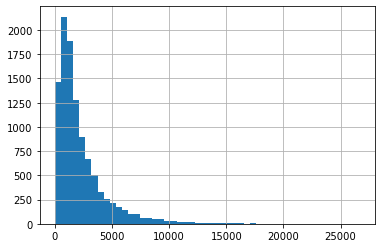

In [55]:
train_df['html_content_text_len'] = train_df.html_content_text.str.len()
train_df.html_content_text_len.hist(bins=50)

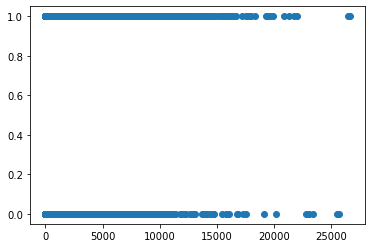

In [56]:
plt.scatter(train_df.html_content_text_len, train_df.state)